<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Funções-importantes-de-Teoria-dos-Números" data-toc-modified-id="Funções-importantes-de-Teoria-dos-Números-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Funções importantes de Teoria dos Números</a></span><ul class="toc-item"><li><span><a href="#Máximo-Divisor-Comum-(GCD)" data-toc-modified-id="Máximo-Divisor-Comum-(GCD)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Máximo Divisor Comum (GCD)</a></span></li><li><span><a href="#Exponenciação-modular" data-toc-modified-id="Exponenciação-modular-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exponenciação modular</a></span></li><li><span><a href="#Inverso-Módulo" data-toc-modified-id="Inverso-Módulo-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Inverso Módulo</a></span></li></ul></li><li><span><a href="#Trabalhando-com-Anel-de-Inteiros-em-Sage" data-toc-modified-id="Trabalhando-com-Anel-de-Inteiros-em-Sage-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Trabalhando com Anel de Inteiros em Sage</a></span><ul class="toc-item"><li><span><a href="#Definindo-um-anel-de-inteiros-$\bmod-n$" data-toc-modified-id="Definindo-um-anel-de-inteiros-$\bmod-n$-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Definindo um anel de inteiros $\bmod n$</a></span></li><li><span><a href="#Exponenciação-modular-vem-de-tabela" data-toc-modified-id="Exponenciação-modular-vem-de-tabela-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exponenciação modular vem de tabela</a></span></li><li><span><a href="#Inverso-módulo-vem-de-tabela" data-toc-modified-id="Inverso-módulo-vem-de-tabela-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Inverso módulo vem de tabela</a></span></li></ul></li><li><span><a href="#Funções-de-Hash" data-toc-modified-id="Funções-de-Hash-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Funções de Hash</a></span><ul class="toc-item"><li><span><a href="#Propriedades-de-funções-de-Hash-Criptográficas" data-toc-modified-id="Propriedades-de-funções-de-Hash-Criptográficas-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Propriedades de funções de Hash Criptográficas</a></span></li><li><span><a href="#Aplicações-básicas-de-funções-de-Hash" data-toc-modified-id="Aplicações-básicas-de-funções-de-Hash-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Aplicações básicas de funções de Hash</a></span></li><li><span><a href="#Hash-em-Python" data-toc-modified-id="Hash-em-Python-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Hash em Python</a></span></li><li><span><a href="#Implementação-do-esquema-simples-de-autenticação" data-toc-modified-id="Implementação-do-esquema-simples-de-autenticação-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Implementação do esquema simples de autenticação</a></span></li></ul></li><li><span><a href="#Distância-de-Hamming" data-toc-modified-id="Distância-de-Hamming-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Distância de Hamming</a></span></li><li><span><a href="#Assinatura-Digital" data-toc-modified-id="Assinatura-Digital-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Assinatura Digital</a></span><ul class="toc-item"><li><span><a href="#Por-que-assinamos-Hashs-e-não-as-próprias-mensagens?" data-toc-modified-id="Por-que-assinamos-Hashs-e-não-as-próprias-mensagens?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Por que assinamos Hashs e não as próprias mensagens?</a></span></li><li><span><a href="#Calculando-o-Hash-de-um-arquivo" data-toc-modified-id="Calculando-o-Hash-de-um-arquivo-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Calculando o Hash de um arquivo</a></span></li></ul></li></ul></div>

# Introdução ao SAGEMATH

## Funções importantes de Teoria dos Números

Vamos rever alguns conceitos das semanas passadas.

### Máximo Divisor Comum (GCD)

Já sabemos que o mdc entre dois números pode ser computado facilmente em Sage:

In [3]:
gcd(14, 7)

7

### Exponenciação modular

Também já vimos que, quando estamos tratando do grupo de inteiros $\bmod n$, devemos usar sempre a exponenciação modular, pois fazer a exponenciação normal e tirar o módulo pode ser muito caro.

In [4]:
power_mod(13, 123784, 273892)

257297

In [5]:
13**123784 % 273892

257297

In [6]:
import timeit

MAX_INT  = 10000
NSAMPLES = 1000

def compare_modular_exponentiation_efficiency(nsamples=NSAMPLES, max_int=MAX_INT):
    
    data = {
        'n': [],
        'p': [],
        'time_power_mod': [],
        'time_regular_exponentiation': []
    }
    
    for _ in range(nsamples):
        n = randint(1, max_int)
        p = random_prime(max_int)
        exponent = randint(1, max_int)

        def compute_with_power_mod():
            v = power_mod(n, exponent, p)

        time_power_mod = timeit.timeit(compute_with_power_mod, number=10)

        def compute_with_regular_exponentiation():
            v = n**exponent % p

        time_regular_exponentiation = timeit.timeit(compute_with_regular_exponentiation, number=10)

        data['n'].append(n)
        data['p'].append(p)
        data['time_power_mod'].append(time_power_mod)
        data['time_regular_exponentiation'].append(time_regular_exponentiation)

        
    return data

data = compare_modular_exponentiation_efficiency()

<IPython.core.display.Javascript object>


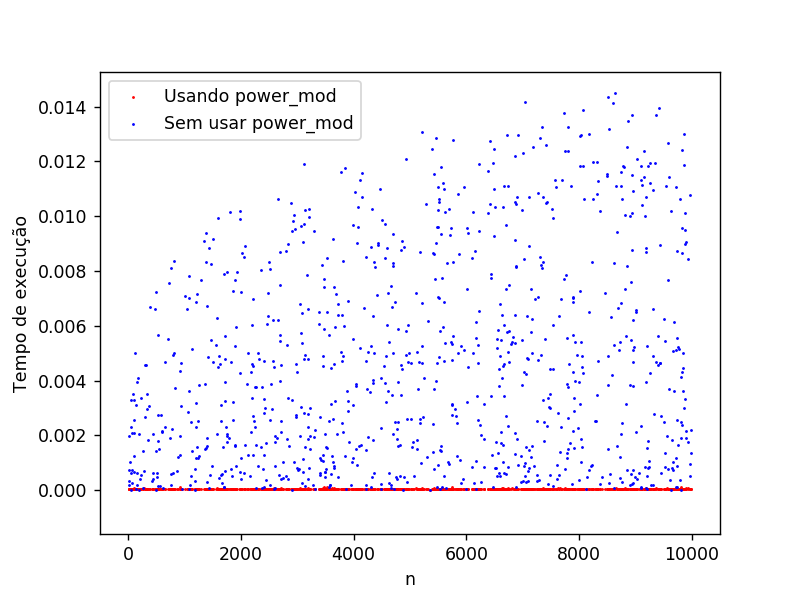

In [7]:
%matplotlib notebook

import matplotlib.pyplot as plt

import pandas as pd

df = pd.DataFrame.from_dict(data)

ax = plt.gca()

df.plot.scatter(x='n', y='time_power_mod', label='Usando power_mod', c='red', ax=ax, s=0.4)
df.plot.scatter(x='n', y='time_regular_exponentiation', c='blue', label='Sem usar power_mod', ax=ax, s=0.4)

plt.ylabel('Tempo de execução')
plt.legend()


### Inverso Módulo

Já vimos que é possível calcular a inversa $\bmod n$ usando o algoritmo de Euclides estendido.
Mas como essa é uma função muito importante, já vem implementada diretamente em Sage.

In [8]:
inverse_mod(4, 13)

10

In [9]:
4*10 % 13

1

## Trabalhando com Anel de Inteiros em Sage

Nesta seção veremos como o Sage dá uma interface um pouco mais amigável e natural para trabalhar com as funções acima.

### Definindo um anel de inteiros $\bmod n$

Para trabalhar diretamente no anel de inteiros $\bmod n$ fazemos assim:

In [10]:
A = Integers(13) # n = 13

Alguns métodos do grupo:

In [17]:
A.addition_table('digits')

 +  00 01 02 03 04 05 06 07 08 09 10 11 12
  +---------------------------------------
00| 00 01 02 03 04 05 06 07 08 09 10 11 12
01| 01 02 03 04 05 06 07 08 09 10 11 12 00
02| 02 03 04 05 06 07 08 09 10 11 12 00 01
03| 03 04 05 06 07 08 09 10 11 12 00 01 02
04| 04 05 06 07 08 09 10 11 12 00 01 02 03
05| 05 06 07 08 09 10 11 12 00 01 02 03 04
06| 06 07 08 09 10 11 12 00 01 02 03 04 05
07| 07 08 09 10 11 12 00 01 02 03 04 05 06
08| 08 09 10 11 12 00 01 02 03 04 05 06 07
09| 09 10 11 12 00 01 02 03 04 05 06 07 08
10| 10 11 12 00 01 02 03 04 05 06 07 08 09
11| 11 12 00 01 02 03 04 05 06 07 08 09 10
12| 12 00 01 02 03 04 05 06 07 08 09 10 11


In [16]:
A.multiplication_table('digits')

 *  00 01 02 03 04 05 06 07 08 09 10 11 12
  +---------------------------------------
00| 00 00 00 00 00 00 00 00 00 00 00 00 00
01| 00 01 02 03 04 05 06 07 08 09 10 11 12
02| 00 02 04 06 08 10 12 01 03 05 07 09 11
03| 00 03 06 09 12 02 05 08 11 01 04 07 10
04| 00 04 08 12 03 07 11 02 06 10 01 05 09
05| 00 05 10 02 07 12 04 09 01 06 11 03 08
06| 00 06 12 05 11 04 10 03 09 02 08 01 07
07| 00 07 01 08 02 09 03 10 04 11 05 12 06
08| 00 08 03 11 06 01 09 04 12 07 02 10 05
09| 00 09 05 01 10 06 02 11 07 03 12 08 04
10| 00 10 07 04 01 11 08 05 02 12 09 06 03
11| 00 11 09 07 05 03 01 12 10 08 06 04 02
12| 00 12 11 10 09 08 07 06 05 04 03 02 01


In [43]:
a = A.random_element()
b = A.random_element()

In [44]:
a, b

(12, 4)

In [45]:
a*b

9

In [49]:
A(12)*4

9

In [50]:
A.cardinality()

13

Podemos até gerar o anel polinomial com coeficientes em R:

In [22]:
R.<t> = A[]

In [38]:
R.random_element(degree=(-1, 100))

7*t^37 + 7*t^36 + 12*t^35 + 9*t^33 + 9*t^32 + 12*t^30 + 12*t^29 + 4*t^28 + 8*t^27 + 6*t^26 + 11*t^25 + t^24 + 6*t^23 + 9*t^22 + 8*t^21 + 9*t^20 + 11*t^19 + 11*t^18 + 12*t^17 + 4*t^16 + 11*t^15 + 3*t^14 + 9*t^13 + 10*t^12 + 11*t^11 + 6*t^10 + 11*t^9 + 4*t^8 + 5*t^7 + 8*t^6 + 7*t^5 + 11*t^4 + t^3 + 8*t^2 + 6*t

In [26]:
R

Univariate Polynomial Ring in t over Ring of integers modulo 13

In [52]:
R.cardinality()

+Infinity

Podemos pegar elementos irredutíveis de R:

In [53]:
m = R.irreducible_element(3)
m

t^3 + 2*t + 11

In [54]:
Q.<u> = R.quotient(m)

In [55]:
p1 = Q.random_element()
p2 = Q.random_element()
print('p1=', p1)
print('p2=', p2)

p1= 2*u^2 + 5*u
p2= 7*u^2 + 11*u + 1


In [56]:
Q.cardinality()

2197

In [58]:
p = p1*p2
print(p)

3*u^2 + 10*u + 10


Podemos fazer a operação de lift para transformar $p_1$ num elemento no anel pai (sem módulo)

In [60]:
p1.lift()*p2.lift()

t^4 + 5*t^3 + 5*t^2 + 5*t

Compare o que acontece quando elevamos o $p_1$ lifted ao quadrado

In [18]:
p1**2

u^2 + 7*u

In [19]:
p1.lift()**2

4*t^4 + 2*t^3 + 9*t^2 + 3*t + 9

In [20]:
q1 = p1.lift()
q2 = p2.lift()

In [21]:
(q1*q2)

12*t^4 + 7*t^3 + 3*t^2 + 2*t + 2

In [22]:
q = (q1*q2).mod(m)
print(q)

5*t^2 + 12*t + 3


Note que o valor de $q$ é o mesmo de $p$ quando lifted

In [23]:
q == p.lift()

True

Acho que já viemos longe demais de cripto!

### Exponenciação modular vem de tabela

Voltando paro o nosso anel $R$

In [61]:
A

Ring of integers modulo 13

Podemos transformar pegar qualquer inteiro e escalá-lo para um elemento de $R$

In [62]:
A(10)

10

In [63]:
A(-2)

11

Elementos em $R$ têm o privilégio de já vir com exponenciação modular

In [68]:
A(3)**902323489594240240419283287419823479128347439

3

### Inverso módulo vem de tabela

Além disso, o inverso dos elementos em $R$ também é feito levando o módulo em consideração

In [70]:
1/A(5)

8

In [69]:
inverse_mod(5, 13)

8

In [71]:
A(5)^-1

8

In [73]:
A(5)^-1 * A(5)

1

In [74]:
B = Integers(50)

In [78]:
B(3)^(-1)

17

IMPORTANTE: Uma operação com elementos em $R$ é automaticamente avaliada em $R$

In [79]:
R(5) * 1000

8

## Funções de Hash

Agora saímos um pouco de Sage e vamos falar sobre Cripto.

O que vocês sabem sobre funções de Hash?

### Propriedades de funções de Hash Criptográficas

1. Uma função determinística $h$: mesma entrada implica em mesma saída.
2. Computação de $h$ é eficiente
3. Dado um valor $y$ é computacionalmente inviável encontrar $x$ tal que $h(x) = y$
4. Computacionalmente inviável encontrar duas mensagens com mesmo hash
5. Uma pequena alteração na entrada deve produzir alteração catastrófica na saída


É importante internalizar essas propriedades.

São das primitivas mais importantes em criptografia hoje.

Implementação de funções de Hash é uma área bem ativa e importante de criptografia simétrica.

### Aplicações básicas de funções de Hash

Uma das principais aplicações de funções de hash é na autenticação de mensagens **quando as duas partes compartilham uma chave secreta**. Note que é bem diferente de assinatura digital (assimétrica).


Seja $k$ uma chave secreta que eu compartilho com o Luís. Para autenticar uma mensagem $m$ basta que eu mande para o Luís o par $(m, s)$, onde $s = h(m\|k)$.
Para Luís garantir que eu mesmo escrevi $m$, basta que ele compute o valor de $h(m\|k)$ e verificar se este valor é igual a $s$.

Note que, pela propriedade 3 de funções de hash, um atacante que vê $s$ não consegue descobrir $k$, e nem gerar outra assinatura válida para uma mensagem diferente

### Hash em Python

Python vem com um módulo com várias funções de hash implementadas.

In [101]:
import hashlib

In [102]:
hashlib.algorithms_available

{'blake2b',
 'blake2s',
 'md4',
 'md5',
 'md5-sha1',
 'mdc2',
 'ripemd160',
 'sha1',
 'sha224',
 'sha256',
 'sha384',
 'sha3_224',
 'sha3_256',
 'sha3_384',
 'sha3_512',
 'sha512',
 'sha512_224',
 'sha512_256',
 'shake_128',
 'shake_256',
 'sm3',
 'whirlpool'}

Vamos usar o hash SHA512. Note que a entrada para as funções de hash são sequências de bytes:

In [103]:
help(hashlib.sha512)

Help on built-in function openssl_sha512 in module _hashlib:

openssl_sha512(string=b'')
    Returns a sha512 hash object; optionally initialized with a string



Não é toda string que pode ser lida como uma sequência de bytes:

In [106]:
b'este e um teste'

b'este e um teste'

Precisamos então codificar as strings antes de aplicar o hash.

In [107]:
m = 'este é um teste'.encode('utf-8')
print(m)

b'este \xc3\xa9 um teste'


Agora podemos aplicar a função de hash.

In [109]:
hash_m = hashlib.sha512(m)
print(hash_m)

<sha512 HASH object @ 0x7f4e36cfa2d0>


Para efetivamente calcular o hash como sequẽncia de bytes, podemos usar o método digest, cuja saída é totalmente ilegível.

In [110]:
hash_m.digest()

b'H\x06\x9b\xee\xd5\x18\xe1\t\x90N0\xaf\x91GQ\x8d\x1a\xcf\xa3\xd7Bo\x9c\xfc+5j\x04\xc0^]GAoD\xea\xd8\xe3\x89,\xf3\x1d\xa6\x00\r\xed\x83\xdf\xcbc\x0b4\xc3f\xb2\x17\xe5uv\xe4\x8al\xd2\x8a'

Em geral é mais útil chamar o método hexdigest, cuja saída é em hexadecimal.

In [111]:
hash_m.hexdigest()

'48069beed518e109904e30af9147518d1acfa3d7426f9cfc2b356a04c05e5d47416f44ead8e3892cf31da6000ded83dfcb630b34c366b217e57576e48a6cd28a'

OBS: Mostrei a saída do digest só para quem não está acostumado com hexadecimal passar a achar hexadecimais até que razoáveis.

### Implementação do esquema simples de autenticação

In [114]:
def auth(message, key):
    m = message.encode('utf-8')
    k = key.encode('utf-8')
    
    c = m + k  # Operação de concatenação de sequências de bytes
    
    return hashlib.sha512(c).hexdigest()

Veja que mesmo pequenas mudanças na mensagem tem resultado catastrófico.
Então esta função garante 
1. Autenticidade (sei quem gerou a mensagem)
2. Integridade (a mensagem não foi modificada)

In [115]:
message = 'Essa é uma mensagem boa'
key = 'H4CK3R'
print(auth(message, key))

d52e02f8ad19196b7ec4553c6533bf77ef598e801335c248217740c62852a0043ea3a162088227dccf978178954313a9995d63f813343fac847502b261936b8d


In [116]:
key_false = 'H4CK3r'
print(auth(message, key_false))

1d21ec7458762c3cd2c95830394b0667c70b08a8e1d184b4c3e9aa4825dd77634bee3f0eb613be26bbed1ce093e0aaf8b50e765777e57d27a5488242379880be


In [117]:
message_false = 'Essa é uma mensagem Boa'
print(auth(message_false, key))

dc2b287063d9ddbf0d00cc221c9be91d78075ff0fb47fd6c4c901179e9237c10a63ae14676530cf53b371a80f36b63e8b7daf05d72845eebfaea7f9acbf72020


Apesar de bem simples, há limitações bem severas como:
1. A única coisa que se pode garantir é que um dois dois criou a mensagem! Uma pessoa de fora não saberia dizer de quem veio a mensagem.
2. Apenas quem sabe $k$ consegue determinar a autenticidade (não funciona para assinar documentos públicos)

Estes problemas são resolvidos assinaturas digitais.

## Distância de Hamming

Vimos que as saída da função auth são bem diferentes mesmo quando mudamos pouco a mensagem.

Mas quão diferentes elas são?

Uma medida muito usada para determinar a diferença entre duas strings é o número de bits em que essas strings diferem, conhecida como distância de Hamming.

In [118]:
h1 = auth('Mensagem 1', key)
h2 = auth('Mensagem 2', key)

In [119]:
h1, h2

('6befbcf1cd6b6f3361f0ed25e3c7ab8ba61e2d6f57e4e347934e9decb94b26d83786da8055290acb4a55cab555d49aea9b8e956d163434516cdb4aa965015cdc',
 '8bf1dd9b38ee0aa06d8bb4dec7b0dca0f5654fe8cf82f17d9a24158ca22ccfb05534a969106211ed72e35de1bf1067779209f94fb6cedbf49dce4ad0f42145ca')

*Exemplo*. A distância de Hamming entre $(1, 0, 0, 0, 1, 1)$ e $(1, 1, 0, 0, 0, 1)$ é 2.

Precisamos descobrir quanto valem esses valores em binário.
Python vem com a função bin, que devolve a representação binária de um **inteiro**.

In [120]:
bin(152)

'0b10011000'

Devemos então transformar os hash em inteiros. A função int toma como entrada uma string e uma base, e resolve exatamente o nosso problema.

In [125]:
int(h1, 16)

5653091991284228981359902675427721893933166525932645203985077768696112266667138293354340530426553666759205200998748925064292622818604810987237847064468700

Agora podemos aplicar a função bin.

In [49]:
bin(int(h1, 16))

'0b1101011111011111011110011110001110011010110101101101111001100110110000111110000111011010010010111100011110001111010101110001011101001100001111000101101011011110101011111100100111000110100011110010011010011101001110111101100101110010100101100100110110110000011011110000110110110101000000001010101001010010000101011001011010010100101010111001010101101010101010111010100100110101110101010011011100011101001010101101101000101100011010000110100010100010110110011011011010010101010100101100101000000010101110011011100'

In [133]:
def get_binary_representation_512_bits(h):
    bin_h = bin(int(h, 16))[2:]  # [2:] Tira o 0b da frente
    bin_h_512bits = '0' * (512 - len(bin_h)) + bin_h
    
    return bin_h_512bits

In [134]:
get_binary_representation_512_bits(h1)

'01101011111011111011110011110001110011010110101101101111001100110110000111110000111011010010010111100011110001111010101110001011101001100001111000101101011011110101011111100100111000110100011110010011010011101001110111101100101110010100101100100110110110000011011110000110110110101000000001010101001010010000101011001011010010100101010111001010101101010101010111010100100110101110101010011011100011101001010101101101000101100011010000110100010100010110110011011011010010101010100101100101000000010101110011011100'

In [135]:
def hamming_distance_with_strings(h1, h2):
    bin_h1 = get_binary_representation_512_bits(h1)
    bin_h2 = get_binary_representation_512_bits(h2)
    
    distance = 0
    for x1, x2 in zip(bin_h1, bin_h2):
        if x1 != x2:
            distance += 1
    return distance

A distância de Hamming entre $h_1$ e $h_2$ deve ser de aproximadamente $512/2 = 256$ bits, pois estes valores devem ter distribuição uniformemente aleatória para quem não conhece as mensagens.

In [136]:
hamming_distance_with_strings(h1, h2)

246

## Assinatura Digital

Uma assinatura digital tem o objetivo de fornecer as 3 garantias
1. Autenticidade: o documento foi assinado por certa entidade
2. Integridade: o documento assinado não foi alterado
3. Irretratabilidade: aquele que assinou o documento não pode negar tê-la assinado no futuro


### Por que assinamos Hashs e não as próprias mensagens?

1. Mensagens podem ter qualquer tamanho, e os esquemas de assinatura trabalham com espaços enormes (porém finitos e prefixados de mensagens)

Poderíamos tentar "tirar o módulo da mensagem" mas isso tem um problema tremendo: é muito previsível. Um atacante poderia facilmente gerar uma mensagem totalmente que tem o mesmo módulo. Usando uma função de hash, em que cada bit de entrada afeta toda a saída, isso é evitado.

2. Eficiência, pois podemos trabalhar com números nos esquemas criptográficos.


### Calculando o Hash de um arquivo
Baseado em https://nitratine.net/blog/post/how-to-hash-files-in-python/

Queremos computar o hash de um arquivo. Poderíamos simplesmente ler todo o arquivo para uma string de bytes e depois aplicar o SHA512 como já fizemos. Porém isso tem o problema de ler o arquivo inteiro para e memória de uma vez.
A ideia então é ler bloco por bloco e usar o método update que atualiza o estado de um hash conforme novos dados vão entrando.

In [140]:
def sha512_file(filepath):
    BLOCK_SIZE = 65536  # = 64Kb

    file_hash = hashlib.sha512()
    with open(filepath, 'rb') as f:
        fb = f.read(BLOCK_SIZE) 
        while len(fb) > 0:
            file_hash.update(fb)
            fb = f.read(BLOCK_SIZE)
    
    return file_hash.hexdigest()

Exemplo do estado do objeto Hash. Quero calcular o Hash da mensagem 'Esta é uma mensagem Grande!'

h(Esta) + h(é)    + h(uma) + h(mesagem) + h(Grande)
v1 = 3    v1 = 2
v2 = 12   v2 = 3
v3 = 3    v3 = 4

In [137]:
cat exs/file.txt

Este arquivo é muito importante!


In [138]:
cat exs/file_alter.txt

Este arquivo é pouco importante!


In [141]:
sha512_file('exs/file.txt')

'1a583eed44eef11d5ce85dac0d85c5119247e596904c153d683beee1a0c4d7b0fe95ed5ba2a56c1e6005e676e08cd41c6d3c73d0855cc51c93c42b3f6eb7de50'

In [142]:
sha512_file('exs/file_alter.txt')

'04622fd38ea0c647868eaf0c044a9f3774dd75b426987c4362a6396eb3f9244932868750a0dc9565f59da10b8910679b2daa5192f18f72ed24970e445576f24d'

In [143]:
hamming_distance_with_strings(sha512_file('exs/file.txt'), sha512_file('exs/file_alter.txt'))

262

In [144]:
int(sha512_file('exs/file.txt'), 16)

1379784430316217078018376108907358021603292921984626490772076475086734829823141703229541315303630074477845586497020667698402232728912106852747350224920144